# Unsupervised Learning: Datasets

3장에서 새로 사용되는 dataset들을 알아봅니다.

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings

from IPython.display import display
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

## Dataset: lfw faces (Labeled Faces in the Wild dataset)

- 3023 images
- 87\*65 pixels
- 62 different people

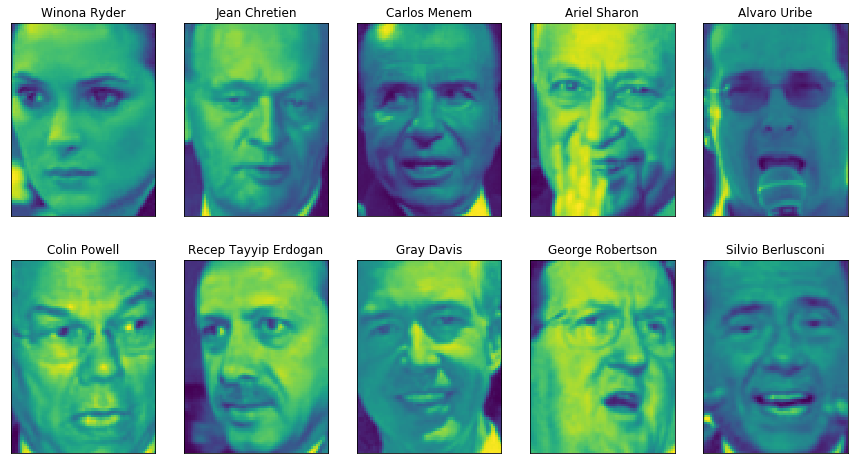

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target]);

In [3]:
print(f"people: {dir(people)}")
print(f"people.data.shape: {people.data.shape}") # image의 디지털 숫자 저장소
print(f"people.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

people: ['DESCR', 'data', 'images', 'target', 'target_names']
people.data.shape: (3023, 5655)
people.images.shape: (3023, 87, 65)
Number of classes: 62


In [4]:
# count how often each target appears
counts = np.bincount(people.target)

# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f"{name:25} {count:3}", end=' ')
    if (i+1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

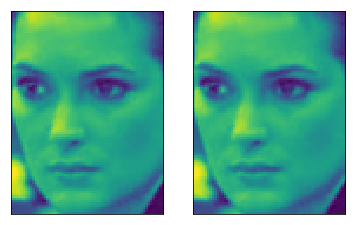

In [5]:
# data 나 images 나 같은 데이터
fix, axes = plt.subplots(1, 2, subplot_kw={'xticks': (), 'yticks': ()})
axes[0].imshow(people.data[0].reshape(87, 65));
axes[1].imshow(people.images[0]);

## Dataset: Digits

`lfw_faces` 와 같은 이미지 데이터셋입니다.

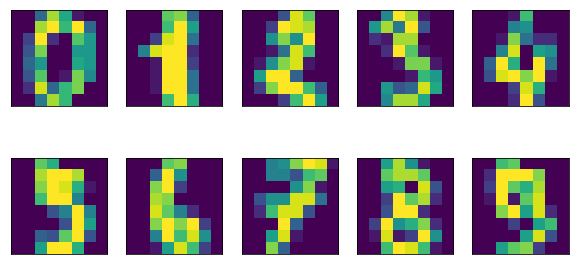

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img);

In [7]:
print(f"digits: {dir(digits)}")
print(f"digits.data.shape: {digits.data.shape}") # image의 디지털 숫자 저장소
print(f"digits.images.shape: {digits.images.shape}")
print(f"Number of classes: {len(digits.target_names)}")

digits: ['DESCR', 'data', 'images', 'target', 'target_names']
digits.data.shape: (1797, 64)
digits.images.shape: (1797, 8, 8)
Number of classes: 10


`lfw_faces`와 같은 방식이라서 더 알아보지는 않겠습니다.

## Dataset: MNIST

3장에서 사용되지는 않지만 유명한 숫자 데이터셋인 MNIST에 대해서 알아봅니다.

[scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html)의 링크에서 로딩하는 코드를 배웠습니다. `fetch_openml`을 부르면 [openml](https://www.openml.org/d/554)에서 데이터를 퍼 온다고 합니다.

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [9]:
print(f'mnist: {dir(mnist)}')
print(f'feature names: {mnist.feature_names[-5:]}')
print(f"mnist.data.shape: {mnist.data.shape}") # training 60k, testing 10k
print(f"unique targets: {np.unique(mnist.target)}")

mnist: ['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']
feature names: ['pixel780', 'pixel781', 'pixel782', 'pixel783', 'pixel784']
mnist.data.shape: (70000, 784)
unique targets: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


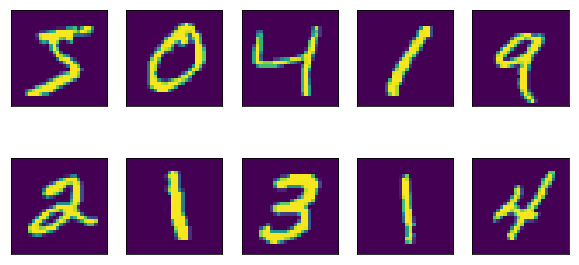

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), mnist.data):
    ax.imshow(img.reshape(28, 28));

## Dataset: make_signals()

`mglearn`에 있는 데이터셋입니다. 코드는 아래와 같습니다.

In [11]:
def make_signals():
    # fix a random state seed
    rng = np.random.RandomState(42)
    n_samples = 2000
    time = np.linspace(0, 8, n_samples)
    # create three signals
    s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
    s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
    s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

    # concatenate the signals, add noise
    S = np.c_[s1, s2, s3]
    S += 0.2 * rng.normal(size=S.shape)

    S /= S.std(axis=0)  # Standardize data
    S -= S.min()
    return S

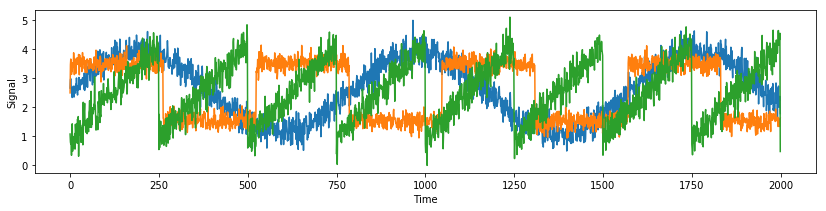

In [12]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(14, 3))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal");